 # Linear Regression from Scratch


In this project, I will be implementing simple and multiple linear regression from scratch by the Ordinary Least Squares method (OLS).

## Simple Linear Regression

### Overview
We must find the best line of best fit that minimizes the sum of squared errors (SSE), i.e., the sum of squared distances between the actual and predicted values. 
##### The SSE can be represented as: 
##### $$SSE=∑(y_{i}-\hat{y_{i}})^2.$$
##### We can represent the equation for a simple regression line as:
##### $$\hat{y}=\beta_{0}+\beta_{1}x$$
where $\hat{y}$ is the dependent variable (predictions), $\beta_{0}$ is the y-intercept, $\beta_{1}$ is the slope, and $x$ is the independent variable.  
In simple linear regression, we aim to find the values for coefficients $\beta_{0}$ and $\beta_{1}$ that minimize the SSE. 

Once the equation of the regression line is determined, we must calculate $R^{2}$ to quantify how much of the variation in the dependent variable is predicted from the independent variable.
##### $R^{2}$ can be expressed as:
##### $$R^{2}=1-\frac{SSE}{SST}, \qquad 0.0\leq{R^{2}}\leq{1.0}$$
where the $SST$ is the total sum of squares, i.e., the total sum of squared distances from the actual values to mean of the dependent variable. The $SST$ can be represented as $SST=∑(y_{i}-\bar{y})^2$. Note that we aim to produce a value for $R^{2}$ that is as close to $1.0$ as possible.

### Calculations Needed for Coefficients
By OLS, $\beta_{1}$ is calculated by:
##### $$\beta_{1}=\frac{∑(x_{i}-\bar{x})(y_{i}-\bar{y})}{∑(x_{i}-\bar{x})^2}$$
and ${\beta}_{0}$ is calcuated by:
##### $$\beta_{0}=\bar{y}-\beta_{1}\bar{x}$$
where $\bar{x}$ is the mean of the independent variable and $\bar{y}$ is the mean of the dependent variable, forming the point $(\bar{x},\bar{y})$. 

### Implementing Simple Linear Regression

#### Importing libraries

In [45]:
import matplotlib.pyplot as plt
import numpy as np

#### Sample Dataset

In [46]:
x = np.arange(1, 51)
y = x*3+5

# Add some random error to the array
y[np.random.randint(0, len(y), size=10)] += np.random.randint(-20,20)
print(f"x = {x}\n\ny = {y}")

x = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]

y = [ 16  11  14  17  20  23  26  37  40  35  38  49  44  55  50  53  56  67
  62  73  68  71  74  85  80  83  86  89  92  95  98 101 112 107 110 113
 116 119 122 125 128 131 134 137 140 143 146 149 152 155]


#### Original SSE Value
Without a relationship yet to be established between the independent and dependent variables, our best prediction at any $x$ will be the mean of the $y$ values. We can visualize this on a graph and compute the SSE, which is in turn equal to the SST.

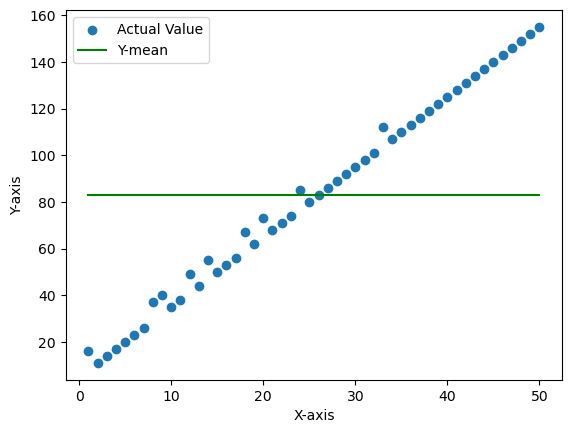

In [47]:
# Plot
plt.scatter(x, y, label="Actual Value")
plt.plot(x, np.array([np.mean(y)] * len(x)), label="Y-mean", color="green")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

In [48]:
# SSE calculation
def SSE(actual_y, predicted_y):

    squared_error = np.sum((actual_y - predicted_y)**2)

    return round(squared_error, 3)


# Print SSE
SSE1 = SSE(y, np.array([np.mean(y)] * len(x)))
print(f"The original SSE prior to fitting a regression line to the data: \nSSE = {SSE1} squared units")

The original SSE prior to fitting a regression line to the data: 
SSE = 89840.82 squared units


#### Compute Coefficients $\beta_{0}$ and $\beta_{1}$
Next, we will use OLS to find coefficients $\beta_{0}$ and $\beta_{1}$ for the equation of the regression line.

In [49]:
# Define a function that computes the coefficients
def coefficients(x, y):

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y- y_mean))
    denominator = np.sum((x - x_mean)**2)
        
    slope = round((numerator / denominator), 3)
    intercept = round((y_mean - slope * x_mean), 3)

    return slope, intercept

# Assign coefficients
B1, B0 = coefficients(x, y)

# Print the coefficients and regression line
print(f"By OLS, the best values for the coefficients are:\n\nB1 = {B1}\nB0 = {B0}\n\nSo, the equation of the regression line is y = {B0} + {B1}x")

By OLS, the best values for the coefficients are:

B1 = 2.93
B0 = 8.225

So, the equation of the regression line is y = 8.225 + 2.93x


#### Using the Regression Line to Make Predictions 
We will compute the model's predictions.

In [50]:
# Define a function that computes the predictions made by the model
def simple_LR_line(B1, B0, x):
    return B0 + B1 * x

# Assign predictions to a variable
y_hat = simple_LR_line(B1, B0, x)

# Print predicted values
print(f"Predicted values: \n{y_hat}")

Predicted values: 
[ 11.155  14.085  17.015  19.945  22.875  25.805  28.735  31.665  34.595
  37.525  40.455  43.385  46.315  49.245  52.175  55.105  58.035  60.965
  63.895  66.825  69.755  72.685  75.615  78.545  81.475  84.405  87.335
  90.265  93.195  96.125  99.055 101.985 104.915 107.845 110.775 113.705
 116.635 119.565 122.495 125.425 128.355 131.285 134.215 137.145 140.075
 143.005 145.935 148.865 151.795 154.725]


#### Visualizing the Model

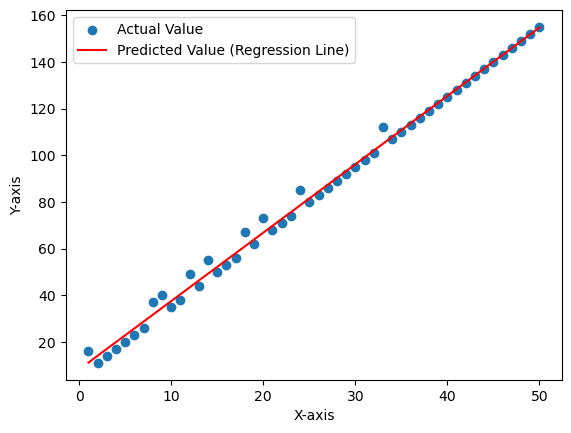

In [51]:
plt.scatter(x, y, label="Actual Value")
plt.plot(x, y_hat, label="Predicted Value (Regression Line)", color="red")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

#### Comparing the Actual and Predicted Values

We can take a look at the values:

In [52]:
print(f"Actual values: {y}\n\n\nPredicted values: {y_hat}")

Actual values: [ 16  11  14  17  20  23  26  37  40  35  38  49  44  55  50  53  56  67
  62  73  68  71  74  85  80  83  86  89  92  95  98 101 112 107 110 113
 116 119 122 125 128 131 134 137 140 143 146 149 152 155]


Predicted values: [ 11.155  14.085  17.015  19.945  22.875  25.805  28.735  31.665  34.595
  37.525  40.455  43.385  46.315  49.245  52.175  55.105  58.035  60.965
  63.895  66.825  69.755  72.685  75.615  78.545  81.475  84.405  87.335
  90.265  93.195  96.125  99.055 101.985 104.915 107.845 110.775 113.705
 116.635 119.565 122.495 125.425 128.355 131.285 134.215 137.145 140.075
 143.005 145.935 148.865 151.795 154.725]


And quantify the difference in the actual and predicted values by recalculating the SSE:

In [53]:
SSE2 = SSE(y, y_hat)

print(f"The original SSE prior to fitting a regression line to the data: \nSSE = {SSE1} squared units\n\nThe new SSE after fitting a regression line to the data is: \nSSE = {SSE2} squared units")
print(f"\n\nTherefore, SSE is minimized" if SSE2 < SSE1 else f"Therefore, SSE is not minimized")

The original SSE prior to fitting a regression line to the data: 
SSE = 89840.82 squared units

The new SSE after fitting a regression line to the data is: 
SSE = 421.981 squared units


Therefore, SSE is minimized


Thus, we have successfully used OLS to estimate coefficients $\beta_{0}$ and $\beta_{1}$ that minimize the SSE.

#### $R^{2}$
Finally, we will quantify how well the model explains the variability in the dependent variable.

In [54]:
# Define a function that computes r-squared
def R_squared(SSE=SSE2, SST=SSE1):
    return round((1 - (SSE / SST)), 3)

# Assign to a variable
r_squared = R_squared(SSE=SSE2, SST=SSE1)

# Print
print(f"R-squared = {r_squared}\n\nTherefore, {r_squared*100}% of the variance in the dependent variable is explained by the independent variable")

R-squared = 0.995

Therefore, 99.5% of the variance in the dependent variable is explained by the independent variable


## Multiple Linear Regression

### Overview
To implement multiple linear regression from scratch, we will also use the OLS method. However, OLS will be used to find the best values for more than just 2 coefficients. Initially, in simple linear regression, we only needed to estimate the slope, $\beta_{1}$, and the y-intercept, $\beta_{0}$. This amounted to finding 2 coefficients in order to estimate the regression line, i.e., model a relationship between one independent and dependent variable. Comparatively, multiple linear regression aims to model a relationship between a singular dependent variable $y$ and multiple independent variables $x_{1},...,x_{n}$. Therefore, we are increasing the number of coefficients we need to estimate in order to find the line of best fit.
##### The equation of a multiple linear regression line can be represented as:
##### $$\hat{y}=\beta_{0}+\beta_{1}x_{1} +...+ \beta_{k}x_{k}$$
where there are $k+1$ unknown parameters, $k$ independent variables, and $k$ slope coefficients. 

Note that, we can express the actual values observed as a vector with $n$ entries, where $n$ represents the number of observations. This is $y$.
##### $$ y=
    \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
    \end{bmatrix}
    $$
Furthermore, we can express the $k+1$ parameters $\beta_{0},...,\beta_{k}$ as a vector with $k+1$ entries. This is the model parameter vector, $\beta$.
##### $$\beta=
    \begin{bmatrix}
    \beta_{0} \\
    \beta_{1} \\
    \vdots \\
    \beta_{k}
    \end{bmatrix}
    $$
Finally, we can express the $k$ independent variables and the y-intercept (where all independent variables are $0$) as a $n\times{(k+1)}$ matrix, such that the first column only contains ones. This is the model matrix, $X$.
##### $$ X=
    \begin{bmatrix}
    1 & x_{11} & x_{12} & \cdots & x_{1k} \\
    1 & x_{21} & x_{22} & \cdots & x_{2k} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \cdots & x_{nk}
    \end{bmatrix}
    $$
Therefore, simplifying the equation of the regression line in matrix form:
##### $$\hat{y}=X\beta$$

### Calculations Needed
To solve for $\beta$, we minimize the loss function (SSE) by taking its derivative with respect to $\beta$ and setting it equal to $0$. We express the result in matrix form, forming the Normal equation:
##### $$(X^{T}X)\beta=X^{T}y.$$
Since we want to find the best values for each of the $k+1$ parameters that minimize the SSE, we must solve for $\beta$:
##### $$\beta=(X^{T}X)^{-1}X^{T}y$$

### Implementing Multiple Linear Regression

#### Sample Dataset

In [55]:
np.random.seed(0)
n_samples = 50
n_features = 3

x = np.random.rand(n_samples, n_features)
true_coeffs = np.array([3, 2, -1])           # true beta values for simulation
y = x @ true_coeffs + np.random.randn(n_samples)  # add some noise

print(f"x = \n{x}\n\ny = {y}")

x = 
[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]
 [0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985]
 [0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329]
 [0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033]
 [0.56843395 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808]
 [0.6818203  0.3595079  0.43703195]
 [0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263 ]
 [0.31542835 0.36371077 0.57019677]
 [0.43860151 0.98837384 0.10204481]
 [0.20887676 0.16130952 0.65310833]
 [0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959]
 [0.13818295 0.19658236 0.36872517]
 [0.82099323 0.09710128 0.83794491]
 [0.09609841 0.97645947 0.4686512 ]
 [0.97676109 0.60484552 0.73926358]
 [0.03918779 0.28280696 0.12019656]
 [0.2961402  0.11872772 0.31798318]
 [0.41426299 0.0641475 

In [56]:
# Add a column of ones to the first column of the mmodel matrix
model_matrix = np.hstack((np.ones((n_samples, 1)), x))

# Print
print(f"X = \n{model_matrix}")

X = 
[[1.         0.5488135  0.71518937 0.60276338]
 [1.         0.54488318 0.4236548  0.64589411]
 [1.         0.43758721 0.891773   0.96366276]
 [1.         0.38344152 0.79172504 0.52889492]
 [1.         0.56804456 0.92559664 0.07103606]
 [1.         0.0871293  0.0202184  0.83261985]
 [1.         0.77815675 0.87001215 0.97861834]
 [1.         0.79915856 0.46147936 0.78052918]
 [1.         0.11827443 0.63992102 0.14335329]
 [1.         0.94466892 0.52184832 0.41466194]
 [1.         0.26455561 0.77423369 0.45615033]
 [1.         0.56843395 0.0187898  0.6176355 ]
 [1.         0.61209572 0.616934   0.94374808]
 [1.         0.6818203  0.3595079  0.43703195]
 [1.         0.6976312  0.06022547 0.66676672]
 [1.         0.67063787 0.21038256 0.1289263 ]
 [1.         0.31542835 0.36371077 0.57019677]
 [1.         0.43860151 0.98837384 0.10204481]
 [1.         0.20887676 0.16130952 0.65310833]
 [1.         0.2532916  0.46631077 0.24442559]
 [1.         0.15896958 0.11037514 0.65632959]
 [1.    

#### Computing Coefficients
To find the value of every coefficient, we will use the Normal equation to find $\beta$

In [57]:
### Calculation
beta = np.linalg.inv(model_matrix.T @ model_matrix) @ model_matrix.T @ y
print(f"B = \n{beta}")

### Communication 
# Assign coefficients to variables
def coefficients(parameter_vec):
    coeffs = {"B0": parameter_vec[0]}        # create a dictionary of coefficients
    for i in range(1, len(parameter_vec)):
        coeffs[f"B{i}"] = parameter_vec[i]
    return coeffs

coeff_dict = coefficients(beta)

# Create the equation of regression line (string)
def eqn_line(coeff_dict):
    equation = f"{coeff_dict['B0']:.3f}"
    for i in range(1, len(coeff_dict)):
        equation += f" + {coeff_dict[f'B{i}']:.3f} * x{i}"
    return equation
    
regression_line = eqn_line(coeff_dict)

# Print the coefficients and regression line
print("\nBy OLS, the best values for the coefficients are:\n")
for key, value in coeff_dict.items():
    print(f"{key} = {value:.3f}")

print(f"\nSo, the equation of the regression line is:\n\n  y = {regression_line}")

B = 
[ 0.05232054  3.6012031   2.0596092  -1.60711441]

By OLS, the best values for the coefficients are:

B0 = 0.052
B1 = 3.601
B2 = 2.060
B3 = -1.607

So, the equation of the regression line is:

  y = 0.052 + 3.601 * x1 + 2.060 * x2 + -1.607 * x3


#### Using the Regression Line to Make Predictions 
For simplicity, we can use the matrix form of our regression line to compute the predictions made by the model:
##### $$\hat{y}=X\beta.$$

In [58]:
# Define a function that computes the predictions made by the model
def multiple_LR_line(beta_vec, design_matrix):
    return design_matrix @ beta_vec

# Assign predictions to a variable
y_pred = multiple_LR_line(beta, model_matrix)

# Print predicted values
print(f"Predicted values: \n{y_pred}")

Predicted values: 
[ 2.53301032  1.84909313  1.91614853  2.21382085  3.89016865 -0.93038251
  3.07375443  2.62632029  1.56585286  3.8626596   1.86657209  1.14545538
  2.01053336  2.54577934  1.6171027   2.69353026  1.0209727   3.50347983
  0.08714293  1.53207311 -0.20266479  0.36224472  1.86220125  1.65633923
  3.62749984  0.58274594  0.85227889  0.56340257  1.7984466   0.08335879
  2.36234235  2.93361426  0.87368496  1.03133338  4.28186115  2.42688084
  2.0993918   4.06304881  2.383585    2.84865498  2.16010502  2.26989253
 -0.31840899  1.68073882  0.23853636  2.31329048  1.84837728  0.84027402
  4.24424816  3.22936071]


#### Visualizing Predicted VS Actual Values

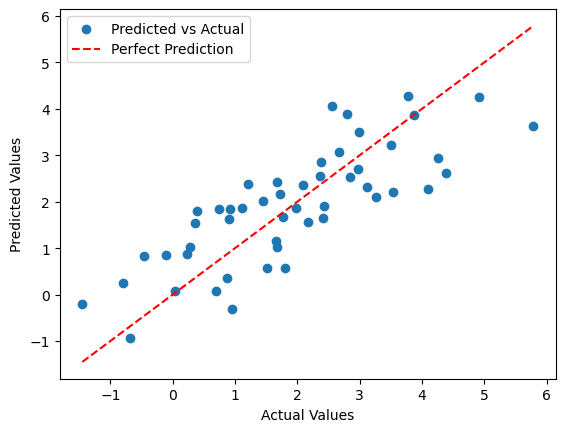

In [59]:
plt.scatter(y, y_pred, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

#### Comparing SSE Values
We check that the OLS method successfully minimized the SSE.

In [60]:
# Original SSE
SSE_mean = SSE(y, np.mean(y) * np.ones_like(y))

# New SSE
SSE_model = SSE(y, y_pred)

# Compare
print(f"The original SSE prior to fitting a regression line to the data: \nSSE = {SSE_mean} squared units\n\nThe new SSE after fitting a regression line to the data is: \nSSE = {SSE_model} squared units")
print(f"\n\nTherefore, SSE is minimized" if SSE_model < SSE_mean else f"Therefore, SSE is not minimized")

The original SSE prior to fitting a regression line to the data: 
SSE = 119.526 squared units

The new SSE after fitting a regression line to the data is: 
SSE = 43.568 squared units


Therefore, SSE is minimized


#### $R^{2}$

In [61]:
# Define a function that computes r-squared
def R_squared(SSE=SSE_model, SST=SSE_mean):
    return round((1 - (SSE / SST)), 3)

# Assign to a variable
r_squared = R_squared(SSE=SSE_model, SST=SSE_mean)

# Print
print(f"R-squared = {r_squared}\n\nTherefore, {r_squared*100}% of the variance in the dependent variable is explained by the independent variable")

R-squared = 0.635

Therefore, 63.5% of the variance in the dependent variable is explained by the independent variable
